# 多元线性回归分析：加州房价预测

本Notebook将带你通过加载加州房价数据集，掌握数据分析与多元线性回归模型的基本用法，适合初学者或教学使用。

**核心公式：**
$$Y = β_0 + β_1X_1 + β_2X_2 + ... + β_nX_n + ε$$

In [1]:
# 导入必要的库
import pandas as pd  # 数据分析处理库
import numpy as np   # 数学计算库
import matplotlib.pyplot as plt  # 绘图工具
import seaborn as sns  # 更好看的可视化库
from sklearn.datasets import fetch_california_housing  # 加载加州房价数据集
from sklearn.linear_model import LinearRegression  # 多元线性回归模型
from sklearn.preprocessing import StandardScaler  # 标准化处理

from sklearn.metrics import mean_squared_error, r2_score  # 模型评价指标
from sklearn.model_selection import cross_val_score  # 交叉验证模块

# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

x_1 0.01 - 0.99 x_2 0.5555

### 加载加州房价数据集

In [61]:
import tarfile
import numpy as np
from sklearn.utils import Bunch

tgz_path = r"E:\sklearn_data\cal_housing.tgz"

with tarfile.open(tgz_path, "r:gz") as f:
    data = np.loadtxt(f.extractfile("CaliforniaHousing/cal_housing.data"), delimiter=",")

X = data[:, :-1]
y = data[:, -1]

feature_names = [
    "MedInc", "HouseAge", "AveRooms", "AveBedrms",
    "Population", "AveOccup", "Latitude", "Longitude"
]

california = Bunch(
    data=X,
    target=y,
    feature_names=feature_names,
    DESCR="California Housing dataset (loaded locally from tgz)"
)

california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df["MedHouseVal"] = california.target
print(california_df)

          MedInc  HouseAge  AveRooms  AveBedrms  Population   AveOccup  \
0     -122.23000  37.88000  41.00000  880.00000   129.00000  322.00000   
1     -122.22000  37.86000  21.00000 7099.00000  1106.00000 2401.00000   
2     -122.24000  37.85000  52.00000 1467.00000   190.00000  496.00000   
3     -122.25000  37.85000  52.00000 1274.00000   235.00000  558.00000   
4     -122.25000  37.85000  52.00000 1627.00000   280.00000  565.00000   
...          ...       ...       ...        ...         ...        ...   
20635 -121.09000  39.48000  25.00000 1665.00000   374.00000  845.00000   
20636 -121.21000  39.49000  18.00000  697.00000   150.00000  356.00000   
20637 -121.22000  39.43000  17.00000 2254.00000   485.00000 1007.00000   
20638 -121.32000  39.43000  18.00000 1860.00000   409.00000  741.00000   
20639 -121.24000  39.37000  16.00000 2785.00000   616.00000 1387.00000   

        Latitude  Longitude  MedHouseVal  
0      126.00000    8.32520 452600.00000  
1     1138.00000    8.301

### 数据预览与统计信息

In [62]:
print("前5行数据：")
print(california_df.head())
print("\n数据描述信息：")
print(california_df.describe())

前5行数据：
      MedInc  HouseAge  AveRooms  AveBedrms  Population   AveOccup   Latitude  \
0 -122.23000  37.88000  41.00000  880.00000   129.00000  322.00000  126.00000   
1 -122.22000  37.86000  21.00000 7099.00000  1106.00000 2401.00000 1138.00000   
2 -122.24000  37.85000  52.00000 1467.00000   190.00000  496.00000  177.00000   
3 -122.25000  37.85000  52.00000 1274.00000   235.00000  558.00000  219.00000   
4 -122.25000  37.85000  52.00000 1627.00000   280.00000  565.00000  259.00000   

   Longitude  MedHouseVal  
0    8.32520 452600.00000  
1    8.30140 358500.00000  
2    7.25740 352100.00000  
3    5.64310 341300.00000  
4    3.84620 342200.00000  

数据描述信息：
           MedInc    HouseAge    AveRooms   AveBedrms  Population    AveOccup  \
count 20640.00000 20640.00000 20640.00000 20640.00000 20640.00000 20640.00000   
mean   -119.56970    35.63186    28.63949  2635.76308   537.89801  1425.47674   
std       2.00353     2.13595    12.58556  2181.61525   421.24791  1132.46212   
min  

### 热力图查看各变量与房价的关系 查看特征之间的相关性

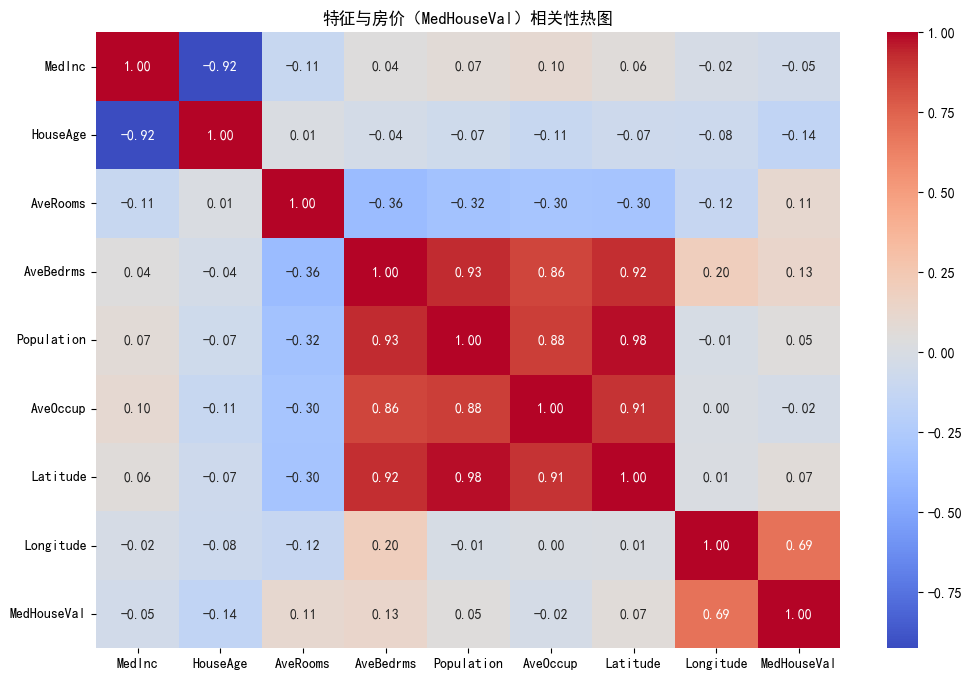

In [68]:
# 查看特征之间的相关性
plt.figure(figsize=(12, 8))
sns.heatmap(california_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("特征与房价（MedHouseVal）相关性热图")
plt.show()

### 特征选择与目标变量设定

In [69]:
features = ['MedInc', 'AveRooms', 'HouseAge','AveBedrms','Population','AveOccup','Latitude','Longitude']  # 中位收入、平均房间数、房屋年龄
# features = [ 'AveRooms','AveBedrms','Longitude']  # 中位收入、平均房间数、房屋年龄
X = california_df[features]  # 作为输入变量
y = california_df['MedHouseVal']  # 房价为目标变量

### 特征标准化处理

In [70]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 建立并训练多元线性回归模型

In [71]:
model = LinearRegression()
model.fit(X_scaled, y)
predictions = model.predict(X_scaled)

### 模型预测与评估

In [72]:
mse = mean_squared_error(y, predictions)  # 均方误差
rmse = np.sqrt(mse)  # 均方根误差
r2 = r2_score(y, predictions)  # 决定系数（拟合优度）

# 10. 输出结果
print("模型系数（β）：", model.coef_)  # 每个特征的权重
print("模型截距（β0）：", model.intercept_)
print("均方误差 MSE：", mse)
print("均方根误差 RMSE：", rmse)
print("决定系数 R²：", r2)

模型系数（β）： [-85796.65072666  14552.37638472 -90939.64816733 -17848.7784485
  47772.85805446 -43638.47860833  18469.24790721  76463.14904987]
模型截距（β0）： 206855.8169089142
均方误差 MSE： 4832121166.957525
均方根误差 RMSE： 69513.46032933137
决定系数 R²： 0.6371056229223448


### 预测结果与真实房价对比图

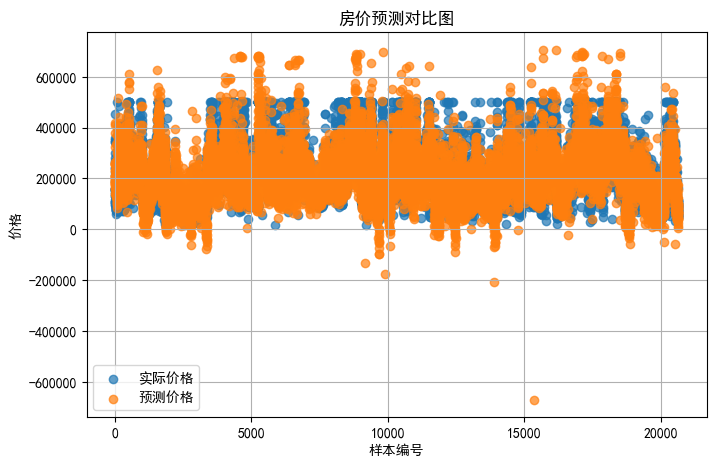

In [73]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y)), y, label='实际价格', alpha=0.7)
plt.scatter(range(len(y)), predictions, label='预测价格', alpha=0.7)
plt.title("房价预测对比图")
plt.xlabel("样本编号")
plt.ylabel("价格")
plt.legend()
plt.grid(True)
plt.show()

### ✅ 扩展任务 1：残差分析（Residual Analysis）

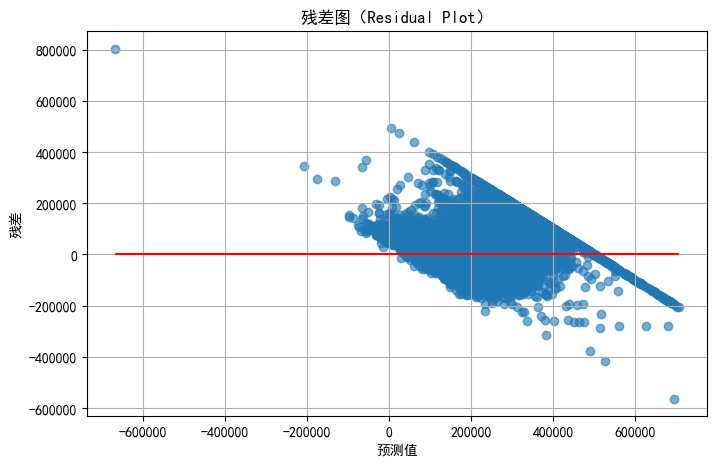

In [74]:
residuals = y - predictions  # 残差 = 实际值 - 预测值
plt.figure(figsize=(8, 5))
plt.scatter(predictions, residuals, alpha=0.6)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), colors='red')
plt.title("残差图（Residual Plot）")
plt.xlabel("预测值")
plt.ylabel("残差")
plt.grid(True)
plt.show()

### # ✅ 扩展任务 2：交叉验证（Cross-validation）

In [75]:
cross_val_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')  # 5折交叉验证
print("5折交叉验证 R² 分数：", cross_val_scores)
print("平均交叉验证得分：", cross_val_scores.mean())

5折交叉验证 R² 分数： [0.58658969 0.52583827 0.58489531 0.54650413 0.6929915 ]
平均交叉验证得分： 0.5873637795534008


### # ✅ 扩展任务 3：误差分布分析（误差是否符合正态分布）

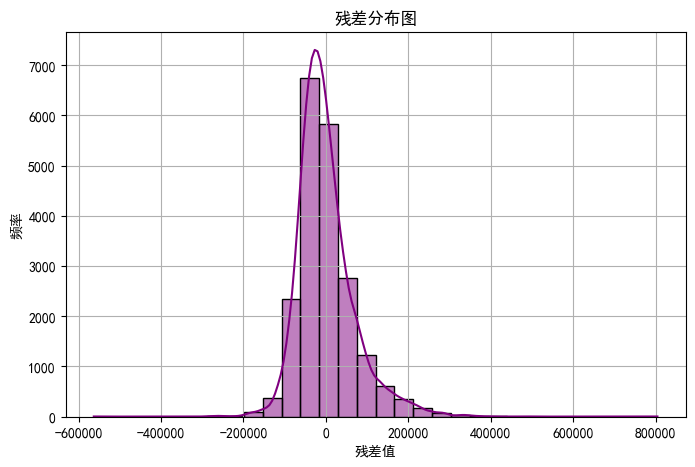

In [76]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title("残差分布图")
plt.xlabel("残差值")
plt.ylabel("频率")
plt.grid(True)
plt.show()

### # ✅ 扩展任务 4：保存回归分析结果到CSV

In [77]:
results_df = pd.DataFrame({
    '特征名称': features,
    '回归系数': model.coef_
})

summary_df = pd.DataFrame({
    '项': ['截距', 'MSE', 'RMSE', 'R²', '交叉验证均值R²'],
    '值': [model.intercept_, mse, rmse, r2, cross_val_scores.mean()]
})

full_results_df = pd.concat([results_df, pd.DataFrame([{}]), summary_df], ignore_index=True)
full_results_df.to_csv("regression_results.csv", index=False, encoding='utf-8-sig')
print("✅ 回归分析结果已保存至 regression_results.csv")

# ✅ 可选扩展任务 5：保存预测值和残差
pred_df = pd.DataFrame({
    '实际房价': y,
    '预测房价': predictions,
    '残差': residuals
})
pred_df.to_csv("predictions_residuals.csv", index=False, encoding='utf-8-sig')
print("✅ 预测值与残差数据已保存至 predictions_residuals.csv")

✅ 回归分析结果已保存至 regression_results.csv
✅ 预测值与残差数据已保存至 predictions_residuals.csv


### 多元线性回归通过组合多个具有解释性的特征（如MedInc、AveRooms等），
1. 能够有效提升对房价预测的准确度。标准化处理帮助模型更快收敛，
2. 回归系数可以解释每个变量对房价的边际影响。

3. 增加残差图可辅助判断模型是否存在非线性偏差；
4. 交叉验证则帮助我们评估模型泛化能力；
5. 残差的分布分析可以验证误差项的正态性，辅助后续改进建模方法；
6. 保存结果有助于学生回顾学习过程并进行汇报展示。